<a href="https://colab.research.google.com/github/taylan-sen/CIS355_intro_to_ai/blob/main/CVSegmentationIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![object detection vs. segmentation](https://www.cybiant.com/wp-content/uploads/2020/01/CKC-image-segmentation-1-768x384.png)

***What is segmentation?***  


**definition 1**: dividing an image into a finite set of meaningful and useful *contiguous* regions.  
**definition 2**: assigning each pixel membership in one of a small set of object candidates.

Why is segmentation so hard?

* *meaningful* and *useful* are not well defined
* the same physical world can generate many different 2D representations. (i.e. segmentation is an *inverse problem*)

**Chinese Room** - the argument/concept that an AI may not really *know* or *deeply undertand* the matter it is dealing with and merely mimicking the analogous process of a person in a room who doesn't understand a language and receives one language in and spits out another language using translation tables without understanding the language.



In [1]:
# get an image in the local environment
!wget 'https://chocolatecoveredkatie.com/wp-content/uploads/2022/03/Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp'
!mv 'Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp' 'image.webp'

--2024-10-04 13:37:16--  https://chocolatecoveredkatie.com/wp-content/uploads/2022/03/Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp
Resolving chocolatecoveredkatie.com (chocolatecoveredkatie.com)... 104.21.1.241, 172.67.152.153, 2606:4700:3035::6815:1f1, ...
Connecting to chocolatecoveredkatie.com (chocolatecoveredkatie.com)|104.21.1.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96172 (94K) [image/webp]
Saving to: ‘Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp’

Galaxy-Donut-Recipe 100%[===================>]  93.92K  --.-KB/s    in 0.02s   

2024-10-04 13:37:17 (4.26 MB/s) - ‘Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp’ saved [96172/96172]



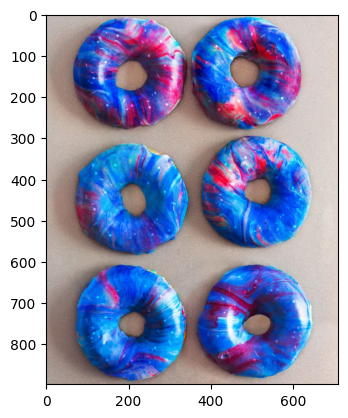

(898, 710, 3)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# verify image "works" by displaying it, after correcting color
img = cv2.imread('image.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

### Problem: How to distinguish donuts from background? (*Eat the donut, not the table!*)

Potential difficulties:  
* shadows
* multi-colored frosting
* glossy-surface reflections
* the donut holes

In [3]:
# convert from tensor to matrix, i.e. partially flatten
print('img shape:', img.shape)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
print('new img shape:', twoDimage.shape)

img shape: (898, 710, 3)
new img shape: (637580, 3)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Linear_RGB_color_wheel.png/220px-Linear_RGB_color_wheel.png)

https://docs.opencv.org/4.x/d5/d38/group__core__cluster.html   



In [4]:
# run the kmeans algorithm
ret, label, center = cv2.kmeans( twoDimage,
                                10,
                                None,
                                (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                                5,
                                cv2.KMEANS_PP_CENTERS)

![](https://sandipanweb.files.wordpress.com/2016/08/kmeans11.gif?w=676)

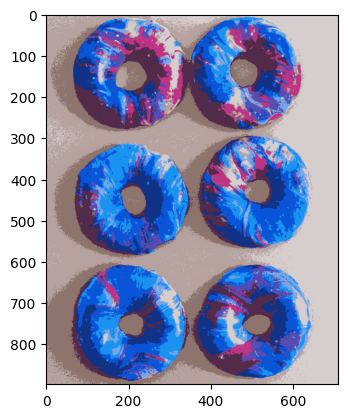

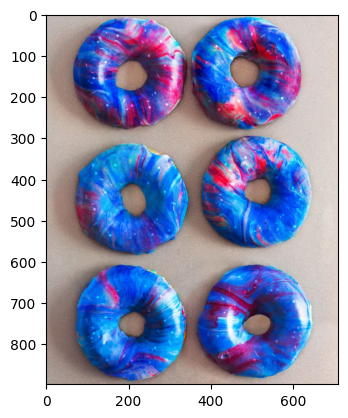

In [5]:
center = np.uint8(center)
res = center[label.flatten()]
new_img = res.reshape((img.shape))
plt.imshow(new_img)
plt.figure()
plt.imshow(img)
plt.show()

In [6]:
!pip install cvzone
!pip install mediapipe


  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=a367e0fcd6d9b6b5b3a2dd05ba7834b00e06dda2eb12e404119b7a0dded65438
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [15]:
!wget https://celebrityinside.com/wp-content/uploads/2015/03/Barack-Obama-Body-Measurements.jpg
!mv 'Barack-Obama-Body-Measurements.jpg' x.jpg

--2024-10-04 13:48:22--  https://celebrityinside.com/wp-content/uploads/2015/03/Barack-Obama-Body-Measurements.jpg
Resolving celebrityinside.com (celebrityinside.com)... 172.67.160.190, 104.21.14.230, 2606:4700:3031::6815:ee6, ...
Connecting to celebrityinside.com (celebrityinside.com)|172.67.160.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18715 (18K) [image/jpeg]
Saving to: ‘Barack-Obama-Body-Measurements.jpg’

Barack-Obama-Body-M 100%[===================>]  18.28K  --.-KB/s    in 0s      

2024-10-04 13:48:22 (101 MB/s) - ‘Barack-Obama-Body-Measurements.jpg’ saved [18715/18715]



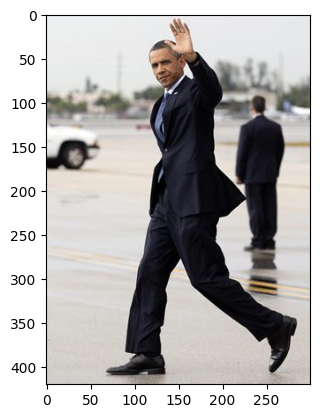

In [16]:
import cvzone
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('x.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

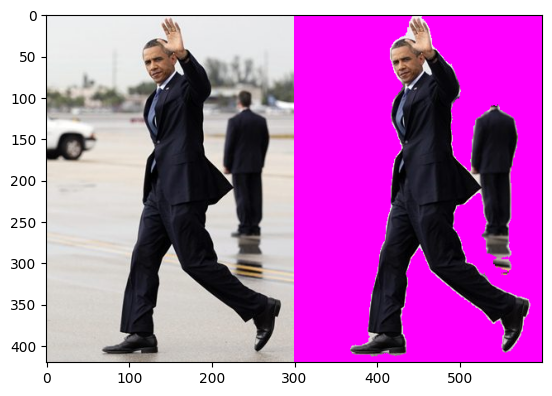

In [17]:
from cvzone.SelfiSegmentationModule import SelfiSegmentation

# Initialize the SelfiSegmentation class. It will be used for background removal.
# model is 0 or 1 - 0 is general 1 is landscape(faster)
segmentor = SelfiSegmentation(model=0)

# Use the SelfiSegmentation class to remove the background
# Replace it with a magenta background (255, 0, 255)
# imgBG can be a color or an image as well. must be same size as the original if image
# 'cutThreshold' is the sensitivity of the segmentation.
imgOut = segmentor.removeBG(img, imgBg=(255, 0, 255), cutThreshold=0.1)

# Stack the original image and the image with background removed side by side
imgStacked = cvzone.stackImages([img, imgOut], cols=2, scale=1)

# Display the stacked images
plt.imshow(imgStacked)
